# Explore line counts & sizes in a mediawiki mysql dump

## TL;DR

### This is step X toward the goal of:

- Get Wikipedia categories into database:
- (Create table simply linking page_id and top-level wikipedia category)

### Questions driving exploration:

- What is inside enwiki-latest-category.sql?
- How is it generally structured?

### Answers:

- **Headers and schema:**
    - from beginning of file
    - to row 40 (41st row)
- **Data:**
    - formatted as sql commands
    - from row 41 (42nd row)
    - to row 163 (164th row)
    - each row has ~10^6 characters
    - row 151 (152nd row) has less; the remainder
- **Footers:**
    - rows 152 through 163 have some footers

## Python Code and Graphs

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Get lengths of the lines in the sql file

In [ ]:
# other files:
# '../data/raw/enwiki-latest-category.sql'

In [12]:
f = open(
    '../data/raw/enwiki-latest-page.sql', 
    mode='r', 
    encoding='UTF_8', 
    errors='backslashreplace')

d = {}
for i in range(10000):
    x = f.readline()
    d[i] = len(x)

for i in range(10000-1, 0, -1):
    if d[i] == 0:
        d.pop(i)
    else:
        break

f.close()

In [13]:
s = pd.Series(d, name='line_lengths')

#### Peek at lengths of first few and last few lines

In [14]:
s.head(10)

0    76
1     3
2    41
3    58
4    38
5     1
6    66
7    68
8    66
9    31
Name: line_lengths, dtype: int64

In [15]:
s.tail(20)

6451    1037442
6452    1037515
6453    1037417
6454    1037268
6455    1037327
6456    1037278
6457    1037438
6458     378861
6459         44
6460         42
6461          1
6462         40
6463         60
6464         50
6465         64
6466         66
6467         64
6468         42
6469          1
6470         41
Name: line_lengths, dtype: int64

#### Look at line-numbers of the first few lines with lots of data

In [16]:
s[s > 10**5].head(4)

51    1037543
52    1037593
53    1037558
54    1037484
Name: line_lengths, dtype: int64

#### Look at a plot of the line lengths

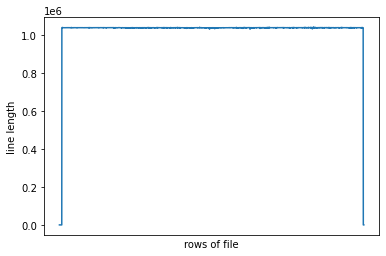

In [18]:
fig = plt.figure()
ax = plt.gca()
s.plot(ax=ax)
ax.set_xticks([])
ax.set_xlabel('rows of file')
ax.set_ylabel('line length')
plt.show()